# Introduction to data visualization

First things first: why should you look at your data? Isn't statistics enough?

In [1]:
import pandas as pd

In [2]:
data4 = pd.read_csv('data/data4.csv')
data4.head()

Unnamed: 0 dataset     x     y
0           0       I  10.0  8.04
1           1       I   8.0  6.95
2           2       I  13.0  7.58
3           3       I   9.0  8.81
4           4       I  11.0  8.33

In [3]:
datasets = data4.groupby('dataset')
datasets.agg(['count', 'mean', 'var'])

Unnamed: 0              x                y                    
             count mean var count mean   var count      mean       var
dataset                                                               
I               11    5  11    11  9.0  11.0    11  7.500909  4.127269
II              11   16  11    11  9.0  11.0    11  7.500909  4.127629
III             11   27  11    11  9.0  11.0    11  7.500000  4.122620
IV              11   38  11    11  9.0  11.0    11  7.500909  4.123249

In [4]:
datasets[['x', 'y']].corr().loc[(slice(None), 'x'), 'y']

dataset   
I        x    0.816421
II       x    0.816237
III      x    0.816287
IV       x    0.816521
Name: y, dtype: float64

In [5]:
from scipy import stats
stats.linregress?

Signature: stats.linregress(x, y=None)
Docstring:
Calculate a linear least-squares regression for two sets of measurements.

Parameters
----------
x, y : array_like
    Two sets of measurements.  Both arrays should have the same length.
    If only x is given (and y=None), then it must be a two-dimensional
    array where one dimension has length 2.  The two sets of measurements
    are then found by splitting the array along the length-2 dimension.

Returns
-------
slope : float
    slope of the regression line
intercept : float
    intercept of the regression line
rvalue : float
    correlation coefficient
pvalue : float
    two-sided p-value for a hypothesis test whose null hypothesis is
    that the slope is zero, using Wald Test with t-distribution of
    the test statistic.
stderr : float
    Standard error of the estimated gradient.

See also
--------
:func:`scipy.optimize.curve_fit` : Use non-linear
 least squares to fit a function to data.
:func:`scipy.optimize.leastsq` : Mini

In [6]:
datasets.apply(lambda df: stats.linregress(df.x, df.y)[:2])

dataset
I      (0.5000909090909091, 3.0000909090909103)
II      (0.5000000000000001, 3.000909090909089)
III     (0.4997272727272729, 3.002454545454544)
IV     (0.4999090909090909, 3.0017272727272726)
dtype: object

Surely these four datasets must be more or less the same for all statistically meaningful purposes...

But let's double-check to be sure...

In [7]:
%matplotlib inline
#%matplotlib notebook
import seaborn as sns
# Seaborn triggers some warnings in scipy, ignore for now
import warnings
warnings.simplefilter('ignore', FutureWarning)

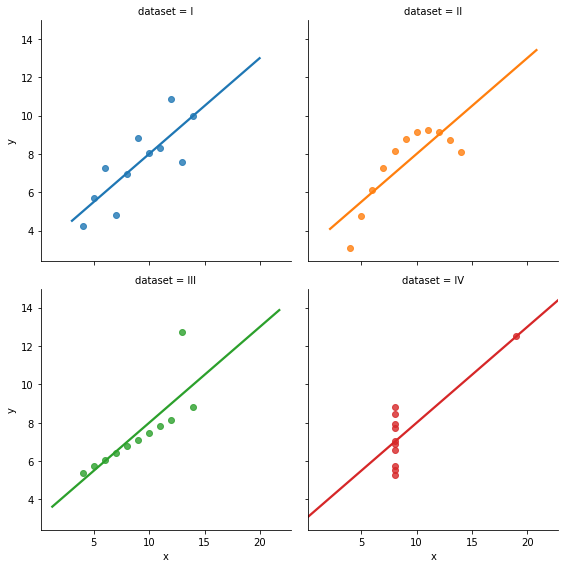

In [8]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=data4,
           col_wrap=2, ci=None, height=4);

<br>
<br>
<br>
<br>
<br>
<br>
<br>

---

These four datasets are known as [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet). But they aren't just a weird pathological specimen. Dinosaurs can do the same:

In [9]:
from IPython.display import Video
Video("https://pbs.twimg.com/tweet_video/CrIDuOhWYAAVzcM.mp4")

For more, see [The Datasaurus dozen](https://www.autodeskresearch.com/publications/samestats).

In [10]:
data12 = pd.read_csv('data/DatasaurusDozen.tsv', sep='\t')
data12.info()
data12.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 3 columns):
dataset    1846 non-null object
x          1846 non-null float64
y          1846 non-null float64
dtypes: float64(2), object(1)
memory usage: 43.3+ KB


dataset        x        y
0    dino  55.3846  97.1795
1    dino  51.5385  96.0256
2    dino  46.1538  94.4872
3    dino  42.8205  91.4103
4    dino  40.7692  88.3333

In [11]:
datasets12 = data12.groupby('dataset')
datasets12.agg(['count', 'mean', 'var'])

x                            y                       
           count       mean         var count       mean         var
dataset                                                             
away         142  54.266100  281.227029   142  47.834721  725.749775
bullseye     142  54.268730  281.207393   142  47.830823  725.533372
circle       142  54.267320  280.898024   142  47.837717  725.226844
dino         142  54.263273  281.069988   142  47.832253  725.515961
dots         142  54.260303  281.156953   142  47.839829  725.235215
h_lines      142  54.261442  281.095333   142  47.830252  725.756931
high_lines   142  54.268805  281.122364   142  47.835450  725.763490
slant_down   142  54.267849  281.124206   142  47.835896  725.553749
slant_up     142  54.265882  281.194420   142  47.831496  725.688605
star         142  54.267341  281.197993   142  47.839545  725.239695
v_lines      142  54.269927  281.231512   142  47.836988  725.638809
wide_lines   142  54.266916  281.232887   142  47.831602  725.650560
x_shape      142  54.260150  281.231481   142  47.839717  725.224991

In [12]:
datasets12[['x', 'y']].corr().loc[(slice(None), 'x'), 'y']

dataset      
away        x   -0.064128
bullseye    x   -0.068586
circle      x   -0.068343
dino        x   -0.064472
dots        x   -0.060341
h_lines     x   -0.061715
high_lines  x   -0.068504
slant_down  x   -0.068980
slant_up    x   -0.068609
star        x   -0.062961
v_lines     x   -0.069446
wide_lines  x   -0.066575
x_shape     x   -0.065583
Name: y, dtype: float64

In [13]:
datasets12.apply(lambda df: stats.linregress(df.x, df.y)[:2])

dataset
away          (-0.10301844877017251, 53.425130045460314)
bullseye       (-0.11016745101058519, 53.80947081136491)
circle         (-0.10981429984201396, 53.79704498505453)
dino           (-0.10358250243265606, 53.45297844922924)
dots           (-0.09691270419219516, 53.09834194650224)
h_lines        (-0.09916498985057429, 53.21108723737492)
high_lines      (-0.11006954968506596, 53.8087931630243)
slant_down    (-0.11081720657278206, 53.849707743907686)
slant_up        (-0.1102184245267219, 53.81259564798684)
star           (-0.10111299704868651, 53.32667872603676)
v_lines        (-0.11155082961051628, 53.89084339369227)
wide_lines      (-0.106940790864462, 53.634948935038146)
x_shape       (-0.10531686581643604, 53.554226251069956)
dtype: object

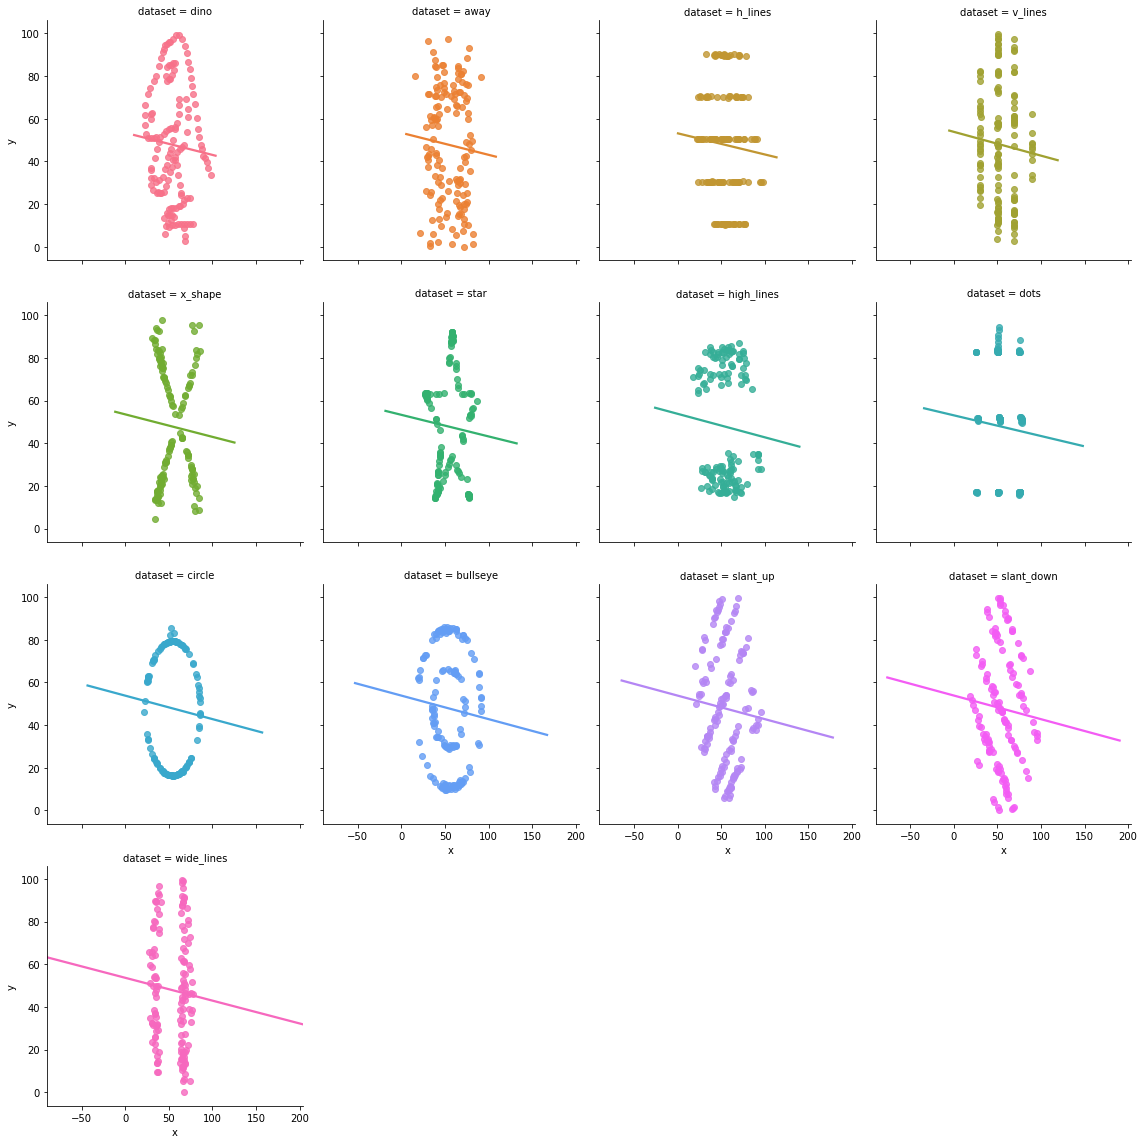

In [14]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=data12,
           col_wrap=4, ci=None, height=4);

## Introduction to matplotlib

The [matplotlib](http://matplotlib.org) library is a powerful tool capable of producing complex publication-quality figures with fine layout control in two and three dimensions; here we will only provide a minimal self-contained introduction to its usage that covers the functionality needed for the rest of the book.  We encourage the reader to read the tutorials included with the matplotlib documentation as well as to browse its extensive gallery of examples that include source code.

Just as we typically use the shorthand `np` for Numpy, we will use `plt` for the `matplotlib.pyplot` module where the easy-to-use plotting functions reside (the library contains a rich object-oriented architecture that we don't have the space to discuss here):

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

The `plot` command:

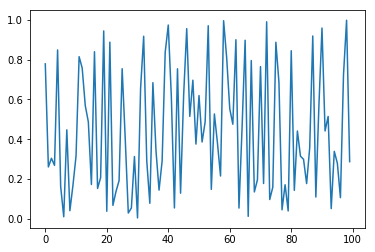

In [16]:
x = np.random.rand(100)
plt.plot(x)

Plotting a function: $f(x) = \sin(x)$:

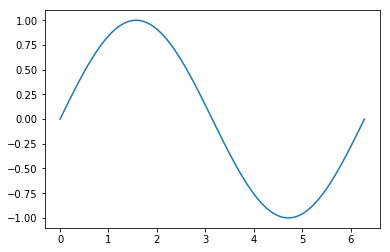

In [17]:
x = np.linspace(0, 2*np.pi, 300)
y = np.sin(x)
plt.plot(x, y);  # note the ';' at the end of the line, it suppresses the Out[N] block.

The most frequently used function is simply called `plot`, here is how you can make a simple plot of $\sin(x)$ and $\sin(x^2)$ for $x \in [0, 2\pi]$ with labels and a grid (we use the semicolon in the last line to suppress the display of some information that is unnecessary right now):

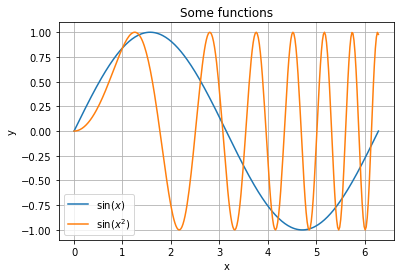

In [18]:
y2 = np.sin(x**2)
plt.plot(x, y, label=r'$\sin(x)$')
plt.plot(x, y2, label=r'$\sin(x^2)$')
plt.title('Some functions')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend();

You can control the style, color and other properties of the markers, for example:

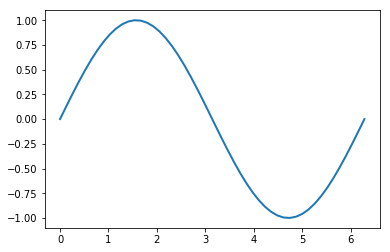

In [19]:
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)
plt.plot(x, y, linewidth=2);

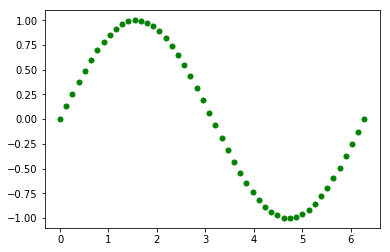

In [20]:
plt.plot(x, y, 'o', markersize=5, color='g');

## Plotting two-dimensional arrays

In [21]:
a = np.random.rand(5,10)
a

array([[0.82834312, 0.56424165, 0.35386875, 0.48031518, 0.13256049,
        0.79590901, 0.16065675, 0.48464212, 0.10673828, 0.02997385],
       [0.30890179, 0.3712213 , 0.0872891 , 0.68821124, 0.62236871,
        0.05211945, 0.50489393, 0.73558655, 0.22494777, 0.82290504],
       [0.1745698 , 0.42984145, 0.16463138, 0.26591732, 0.99043687,
        0.66671388, 0.11557709, 0.92963705, 0.75753879, 0.89119315],
       [0.06409401, 0.7929338 , 0.83711898, 0.25003683, 0.88854256,
        0.16373675, 0.34876486, 0.23179541, 0.81757998, 0.81176172],
       [0.31313264, 0.38014766, 0.05984312, 0.94863945, 0.13010627,
        0.21106669, 0.05533801, 0.68946143, 0.27683799, 0.62652413]])

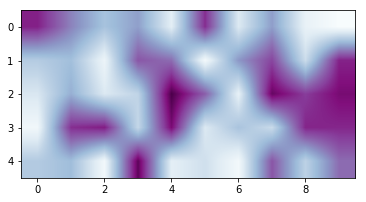

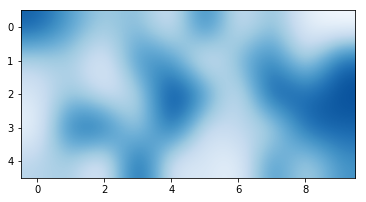

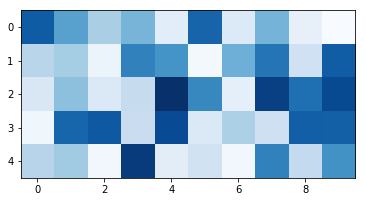

In [22]:
plt.imshow(a, interpolation='bilinear', cmap=plt.cm.BuPu)
plt.figure()
plt.imshow(a, interpolation='bicubic', cmap=plt.cm.Blues)
plt.figure()
plt.imshow(a, interpolation='nearest', cmap=plt.cm.Blues);

In [23]:
img = plt.imread('data/dessert.png')
img.shape

(500, 319, 3)

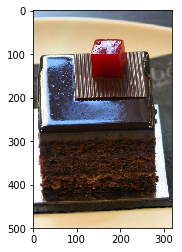

In [24]:
plt.imshow(img);

## Subplots

Plot the r, g, b channels of the image. If we want to directly compare the intensity of the color data in each channel, it's visually clearest if we do so by showing all individual channels as grayscale. 

With the call `clim=(0,1)`, we ensure that the visual range of the grayscale colormap spans the whole (0, 1) range for each channel, so that visual comparisons across make sense. Otherwise matplotlib would use the entire visual range adapted to each channel's data, making that comparison misleading.

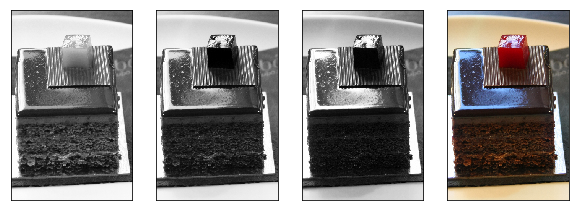

In [25]:
fig, ax = plt.subplots(1,4, figsize=(10,6))
ax[0].imshow(img[:,:,0], cmap=plt.cm.Greys_r, clim=(0, 1))
ax[1].imshow(img[:,:,1], cmap=plt.cm.Greys_r, clim=(0, 1))
ax[2].imshow(img[:,:,2], cmap=plt.cm.Greys_r, clim=(0, 1))
ax[3].imshow(img);
for a in ax:
    a.set_xticklabels([]); a.set_xticks([])
    a.set_yticklabels([]); a.set_yticks([])

Alternatively we can show the channels in their own color, which still conveys similar information, though cross-channel comparisons are now modulated by the human visual system. Note, e.g., how despite the fact that the front of the cake has very little green (as seen above in the strict per-channel comparison), in the image below we still can see a reasonable amount of detail once it's displayed in green color. That's because the human visual system is much more sensitive to green light than red or blue:

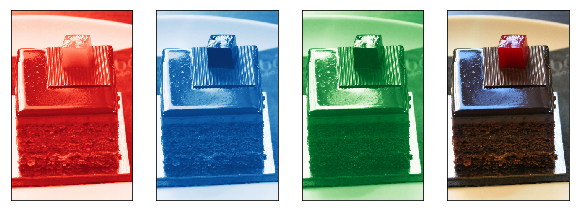

In [26]:
fig, ax = plt.subplots(1,4, figsize=(10,6))
ax[0].imshow(img[:,:,0], cmap=plt.cm.Reds_r, clim=(0, 1))
ax[1].imshow(img[:,:,1], cmap=plt.cm.Blues_r, clim=(0, 1))
ax[2].imshow(img[:,:,2], cmap=plt.cm.Greens_r, clim=(0, 1))
ax[3].imshow(img);
for a in ax:
    a.set_xticklabels([]); a.set_xticks([])
    a.set_yticklabels([]); a.set_yticks([])

An interactive discussion of [colormaps](https://bids.github.io/colormap/) from BIDS scientists Stefan van der Walt and Nathaniel Smith, as well as the work on domain-specific colormaps by [Krysten Thyng](https://matplotlib.org/cmocean).

#### Simple 3d plotting with matplotlib

Matplotlib is mainly a 2-d plotting library, but it has basic 3-d capabilities; you can read more about them in the [3d plotting tutorial](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html). 

Note that you must execute at least once in your session:

In [27]:
from mpl_toolkits.mplot3d import Axes3D

One this has been done, you can create 3d axes with the `projection='3d'` keyword to `add_subplot`:

    fig = plt.figure()
    fig.add_subplot(<other arguments here>, projection='3d')

A simple surface plot:

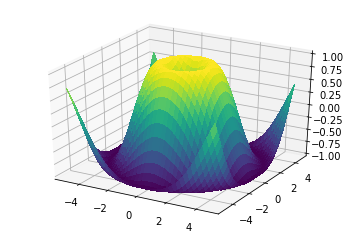

In [28]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)
ax.set_zlim3d(-1.01, 1.01);

## The [matplotlib gallery](http://matplotlib.sourceforge.net/gallery.html)

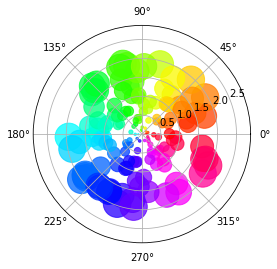

In [29]:
# %load http://matplotlib.org/mpl_examples/pie_and_polar_charts/polar_scatter_demo.py
"""
==========================
Scatter plot on polar axis
==========================

Demo of scatter plot on a polar axis.

Size increases radially in this example and color increases with angle
(just to verify the symbols are being scattered correctly).
"""
import numpy as np
import matplotlib.pyplot as plt


# Compute areas and colors
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta

ax = plt.subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

plt.show()


## Matplotlib and dataframes

In [30]:
cars = pd.read_csv('data/cars.csv')
cars.head()

Unnamed: 0  Acceleration  Cylinders  Displacement  Horsepower  \
0           0          12.0          8         307.0       130.0   
1           1          11.5          8         350.0       165.0   
2           2          11.0          8         318.0       150.0   
3           3          12.0          8         304.0       150.0   
4           4          10.5          8         302.0       140.0   

   Miles_per_Gallon                       Name Origin  Weight_in_lbs  \
0              18.0  chevrolet chevelle malibu    USA           3504   
1              15.0          buick skylark 320    USA           3693   
2              18.0         plymouth satellite    USA           3436   
3              16.0              amc rebel sst    USA           3433   
4              17.0                ford torino    USA           3449   

         Year  
0  1970-01-01  
1  1970-01-01  
2  1970-01-01  
3  1970-01-01  
4  1970-01-01

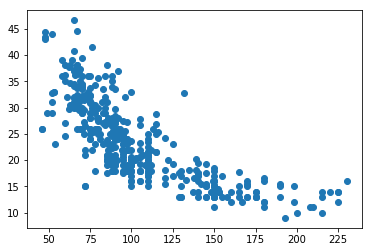

In [31]:
x, y = 'Horsepower', 'Miles_per_Gallon'

plt.scatter(x=x, y=y, data=cars);

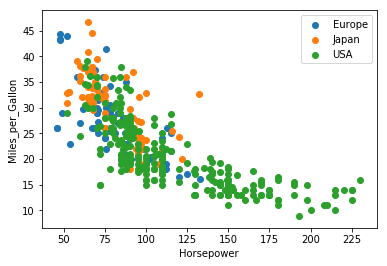

In [32]:
fig, ax = plt.subplots()
for name, df in cars.groupby('Origin'):
    ax.scatter(x=x, y=y, data=df, label=name)

ax.set_xlabel(x)
ax.set_ylabel(y)
ax.legend();

## Seaborn to the rescue: statistical plots with matplotlib

Created by a Stanford graduate student, [Mike Waskom](https://seaborn.pydata.org/).

*Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.*

"...built on top of matplotlib and tightly integrated with the PyData stack, including support for `numpy` and `pandas` data structures and statistical routines from `scipy` and `statsmodels`."

Some of the features that seaborn offers are

 - Several built-in themes that improve on the default matplotlib aesthetics
 - Tools for choosing color palettes to make beautiful plots that reveal patterns in your data
 - Functions for visualizing univariate and bivariate distributions or for comparing them between subsets of data
 - Tools that fit and visualize linear regression models for different kinds of independent and dependent variables
 - Functions that visualize matrices of data and use clustering algorithms to discover structure in those matrices
 - A function to plot statistical timeseries data with flexible estimation and representation of uncertainty around the estimate
 - High-level abstractions for structuring grids of plots that let you easily build complex visualizations

"The plotting functions operate on dataframes and arrays containing a whole dataset and internally perform the necessary aggregation and statistical model-fitting to produce informative plots. If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too."

In [33]:
import seaborn as sns

Text(30.687,0.5,'Miles Per Gallon')

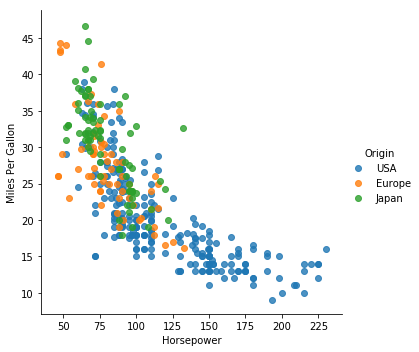

In [34]:
sns.lmplot(x=x, y=y, data=cars, hue='Origin', fit_reg=False)
ax = plt.gca()
ax.set_ylabel('Miles Per Gallon')

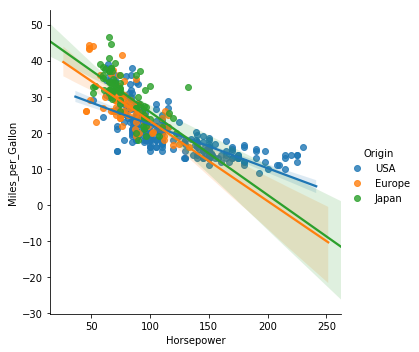

In [35]:
sns.lmplot(x=x, y=y, data=cars, hue='Origin');

In [36]:
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

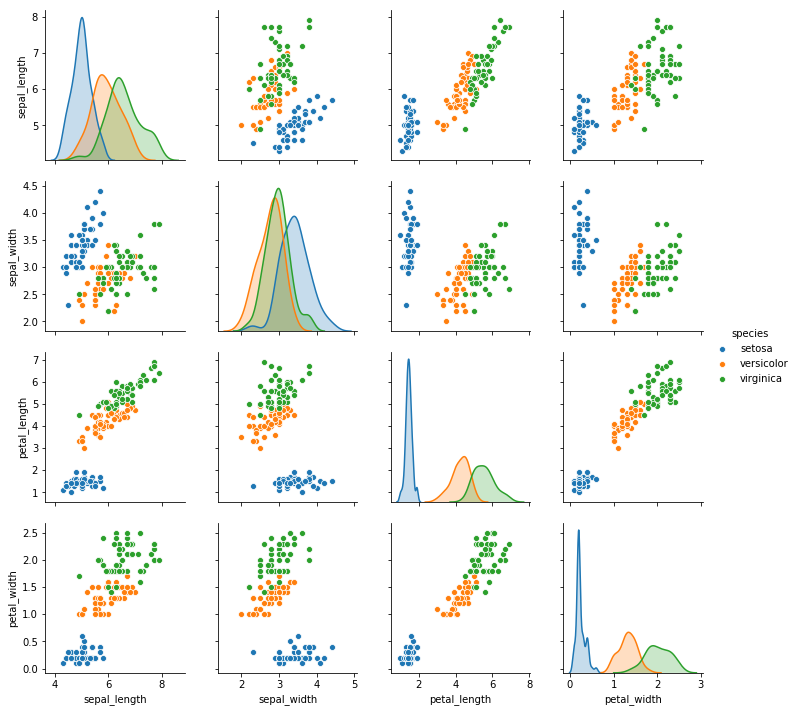

In [37]:
sns.pairplot(iris, hue="species");

## Some other tools, for future reference

### Declarative plots with Altair

[Altair](https://altair-viz.github.io) is a declarative statistical visualization library for Python, based on the [Vega-Lite](https://vega.github.io/vega-lite) visualization grammar for interactive graphics. Created by Jupyter/CalPoly's [Brian Granger](https://github.com/ellisonbg) and UW's [Jake VanderPlas](http://vanderplas.com).

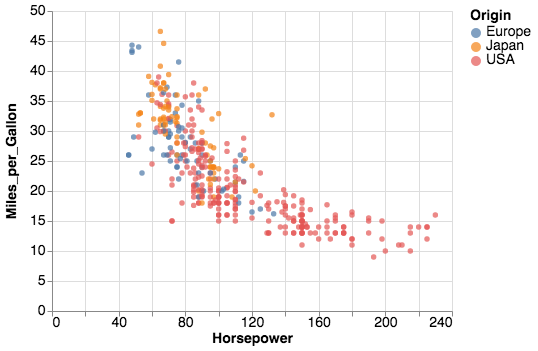

In [38]:
import altair as alt
alt.Chart(cars).mark_circle().encode(x=x, y=y, color='Origin')

### Interactive plots with plotly

An [open-source plotting library](https://plot.ly) with rich JavaScript-based interactivity,  Jupyter Notebook integration and cross-language support (Python, R, Julia, Matlab). Plotly charts can be rendered [offline in the Jupyter Notebook](https://plot.ly/python/offline), or [shared online via Plotly](https://help.plot.ly/how-sharing-works-in-plotly).

In [39]:
import plotly.offline as py
py.init_notebook_mode()

In [40]:
data = [ dict(x=df[x], y=df[y], name=name, mode='markers')
         for name, df in cars.groupby('Origin') ]

In [41]:
fig = {'data': data,
       'layout': {'xaxis': {'title': x},
                  'yaxis': {'title': y} } }
py.iplot(fig)